# Task 1
# Data Name: *Car Evaluation*
Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.

Dataset Characteristics
- Multivariate

- Subject Area -> Other

- Associated Tasks -> Classification

- Feature Type -> Categorical

- No.of Instances -> 1728

- No.of Features -> 

# Dataset Information
- `(related to task 1 )`

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

CAR                      car acceptability
- . PRICE                  overall price
- . . buying               buying price
- . . maint                price of the maintenance
- . TECH                   technical characteristics
- . . COMFORT              comfort
- . . . doors              number of doors
- . . . persons            capacity in terms of persons to carry
- . . . lug_boot           the size of luggage boot
- . . safety               estimated safety of the car

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples (for these examples sets see http://www-ai.ijs.si/BlazZupan/car.html).


The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.


Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.

## Data Features explaining
- `(related to task 1 )`

1. `buying`: Indicates the buying price category of the car. It contain values representing different price ranges or categories like 'low', 'med', 'high', 'vhigh'.

2. `maint`: Represents the maintenance price category of the car. Similar to 'buying', it contains categories or values denoting maintenance cost levels such as 'low', 'med', 'high', 'vhigh'.

3. `doors`: denotes the number of doors in the car. This column contain values representing the count of doors, such as '2', '3', '4', '5more', indicating cars with different door counts.


4. `persons`: Represents the seating capacity or number of persons the car can accommodate. It contain values like '2', '4', 'more', indicating the maximum capacity of persons the car can hold.

5. `lug_boot`: Describes the size of the luggage boot or trunk space in the car. This column include categories or values like 'small', 'med', 'big', representing different luggage space capacities.

6. `safety`: Indicates the safety rating or safety features of the car. It contain categories or values such as 'low', 'med', 'high', denoting safety levels or features available in the car.

7. `class`: Represents the classification or category of the car. This column contains the target variable with classes such as 'unacc' (unacceptable), 'acc' (acceptable), 'good', 'vgood' (very good), categorizing the car's acceptability or rating.

#### Problem Type -> Classification with 4 classes
- `(related to task 1 )`

-  `class`: column Represents the classification or category of the car. This column contains the target variable with classes such as 'unacc' (unacceptable), 'acc' (acceptable), 'good', 'vgood' (very good), categorizing the car's acceptability or rating.

### Preprocessing steps that we will perform
- `(related to task 1 )`
- data loading
- checking noise and data cleaning
- encoding ordinal features to numeric values
- changing data types of necessary columns to int64
- exploratory data analysis using visualization through seaborn, pandas and matplotlib
- splitting data to traing and testing set
### Other steps

- data modeling using Decision tree classifier, 4-fold cross vaidation and GridSearchCV
- Decision tree evaluation through accuracy, recall, precision and confusion matrix
- accuracy and loss curve for DTC
- ANN implementation, evaluation and results visualization
- CNN implementation, evaluation and results visualization
- Comparison of all three algorthms performance-
- result

# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Loading

In [3]:
data = pd.read_csv('dataset/car.csv', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], delimiter=',')

In [5]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Data Preprocessing and EDA
- `(related to task 1 )`

In [8]:
# Checking random 20 samples of data
data.sample(20)

,buying,maint,doors,persons,lug_boot,safety,class
759,high,low,2,2,med,low,unacc
132,vhigh,high,2,more,big,low,unacc
869,med,vhigh,2,2,med,high,unacc
163,vhigh,high,4,2,small,med,unacc
1069,med,high,5more,4,big,med,acc
61,vhigh,vhigh,4,2,big,med,unacc
1252,med,low,4,4,small,med,acc
456,high,vhigh,2,more,big,low,unacc
37,vhigh,vhigh,3,4,small,med,unacc
1506,low,high,5more,more,med,low,unacc


Cheking missing values

In [9]:
data.isna().sum() # we can see that our data is already cleaned and has no missing values

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

their are no missing values in data

In [10]:
# describing data -> to gain totol count, categorories
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [11]:
# data info --> to check the information about features of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [97]:
# as we can see that all features are of object type...so we need to convert them to numerical and we have to factorize or encode the textual columns
data.select_dtypes(include=['object'])

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [98]:
data2 = data.copy()  # we have created a copy of data to perform EDA on data

In [99]:
data2.head()  # head function shows first 5 instances of data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: xlabel='buying'>

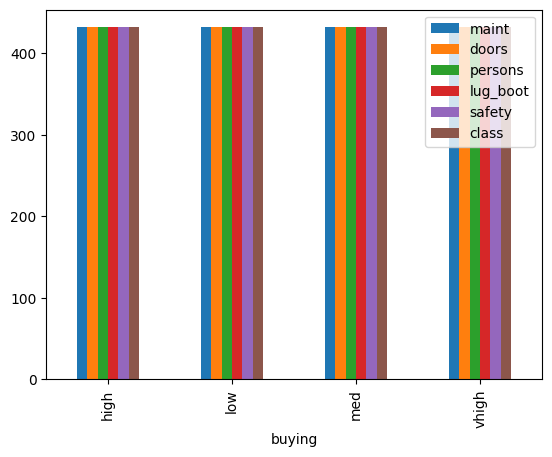

In [15]:
# grouping data according to buying price and seeing data distribution
data2.groupby('buying').count().plot.bar()

In [100]:
#checking unique values of columns so that we can encode them accordingly

buying_index = pd.factorize(data['buying'])[1]
maint_index = pd.factorize(data['maint'])[1]
lug_boot_index = pd.factorize(data['lug_boot'])[1]
saftey_index = pd.factorize(data['safety'])[1]
class_index = pd.factorize(data['class'])[1]

print('buying_index', buying_index)
print('maint_index', maint_index)
print('lug_boot_index', lug_boot_index)
print('saftey_index', saftey_index)
print('class_index', class_index)

# as in output we can see that is ordinal so we have to encode it according to ordinal encoding

buying_index Index(['vhigh', 'high', 'med', 'low'], dtype='object')
maint_index Index(['vhigh', 'high', 'med', 'low'], dtype='object')
lug_boot_index Index(['small', 'med', 'big'], dtype='object')
saftey_index Index(['low', 'med', 'high'], dtype='object')
class_index Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')


### continue

In [18]:
# Define mappings for categorical to numerical values because data is ordinal so we have to do it manually

mapping_buy_maint = {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
mapping_safety = {'low': 0, 'med': 1, 'high': 2}
mapping_lug_boot = {'small': 0, 'med': 1, 'big': 2}
mapping_class = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}

# Map categorical strings to numerical values
data2['buying'] = data2['buying'].map(mapping_buy_maint)
data2['maint'] = data2['maint'].map(mapping_buy_maint)
data2['safety'] = data2['safety'].map(mapping_safety)
data2['lug_boot'] = data2['lug_boot'].map(mapping_lug_boot)
data2['class'] = data2['class'].map(mapping_class)
data3 = data2.replace({'doors':{'5more':5}, 'persons':{'more':6}})  # \here we have replaced the 5more value with 5 and more value with 6
data3 = data3.astype({'doors':'int64', 'persons':'int64'}) # converting doors and persons columns into int64 data type

In [161]:
data3   # no here we can see that our data is cleaned and ready for analysing and plotting 

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,5,6,1,1,2
1724,0,0,5,6,1,2,3
1725,0,0,5,6,2,0,0
1726,0,0,5,6,2,1,2


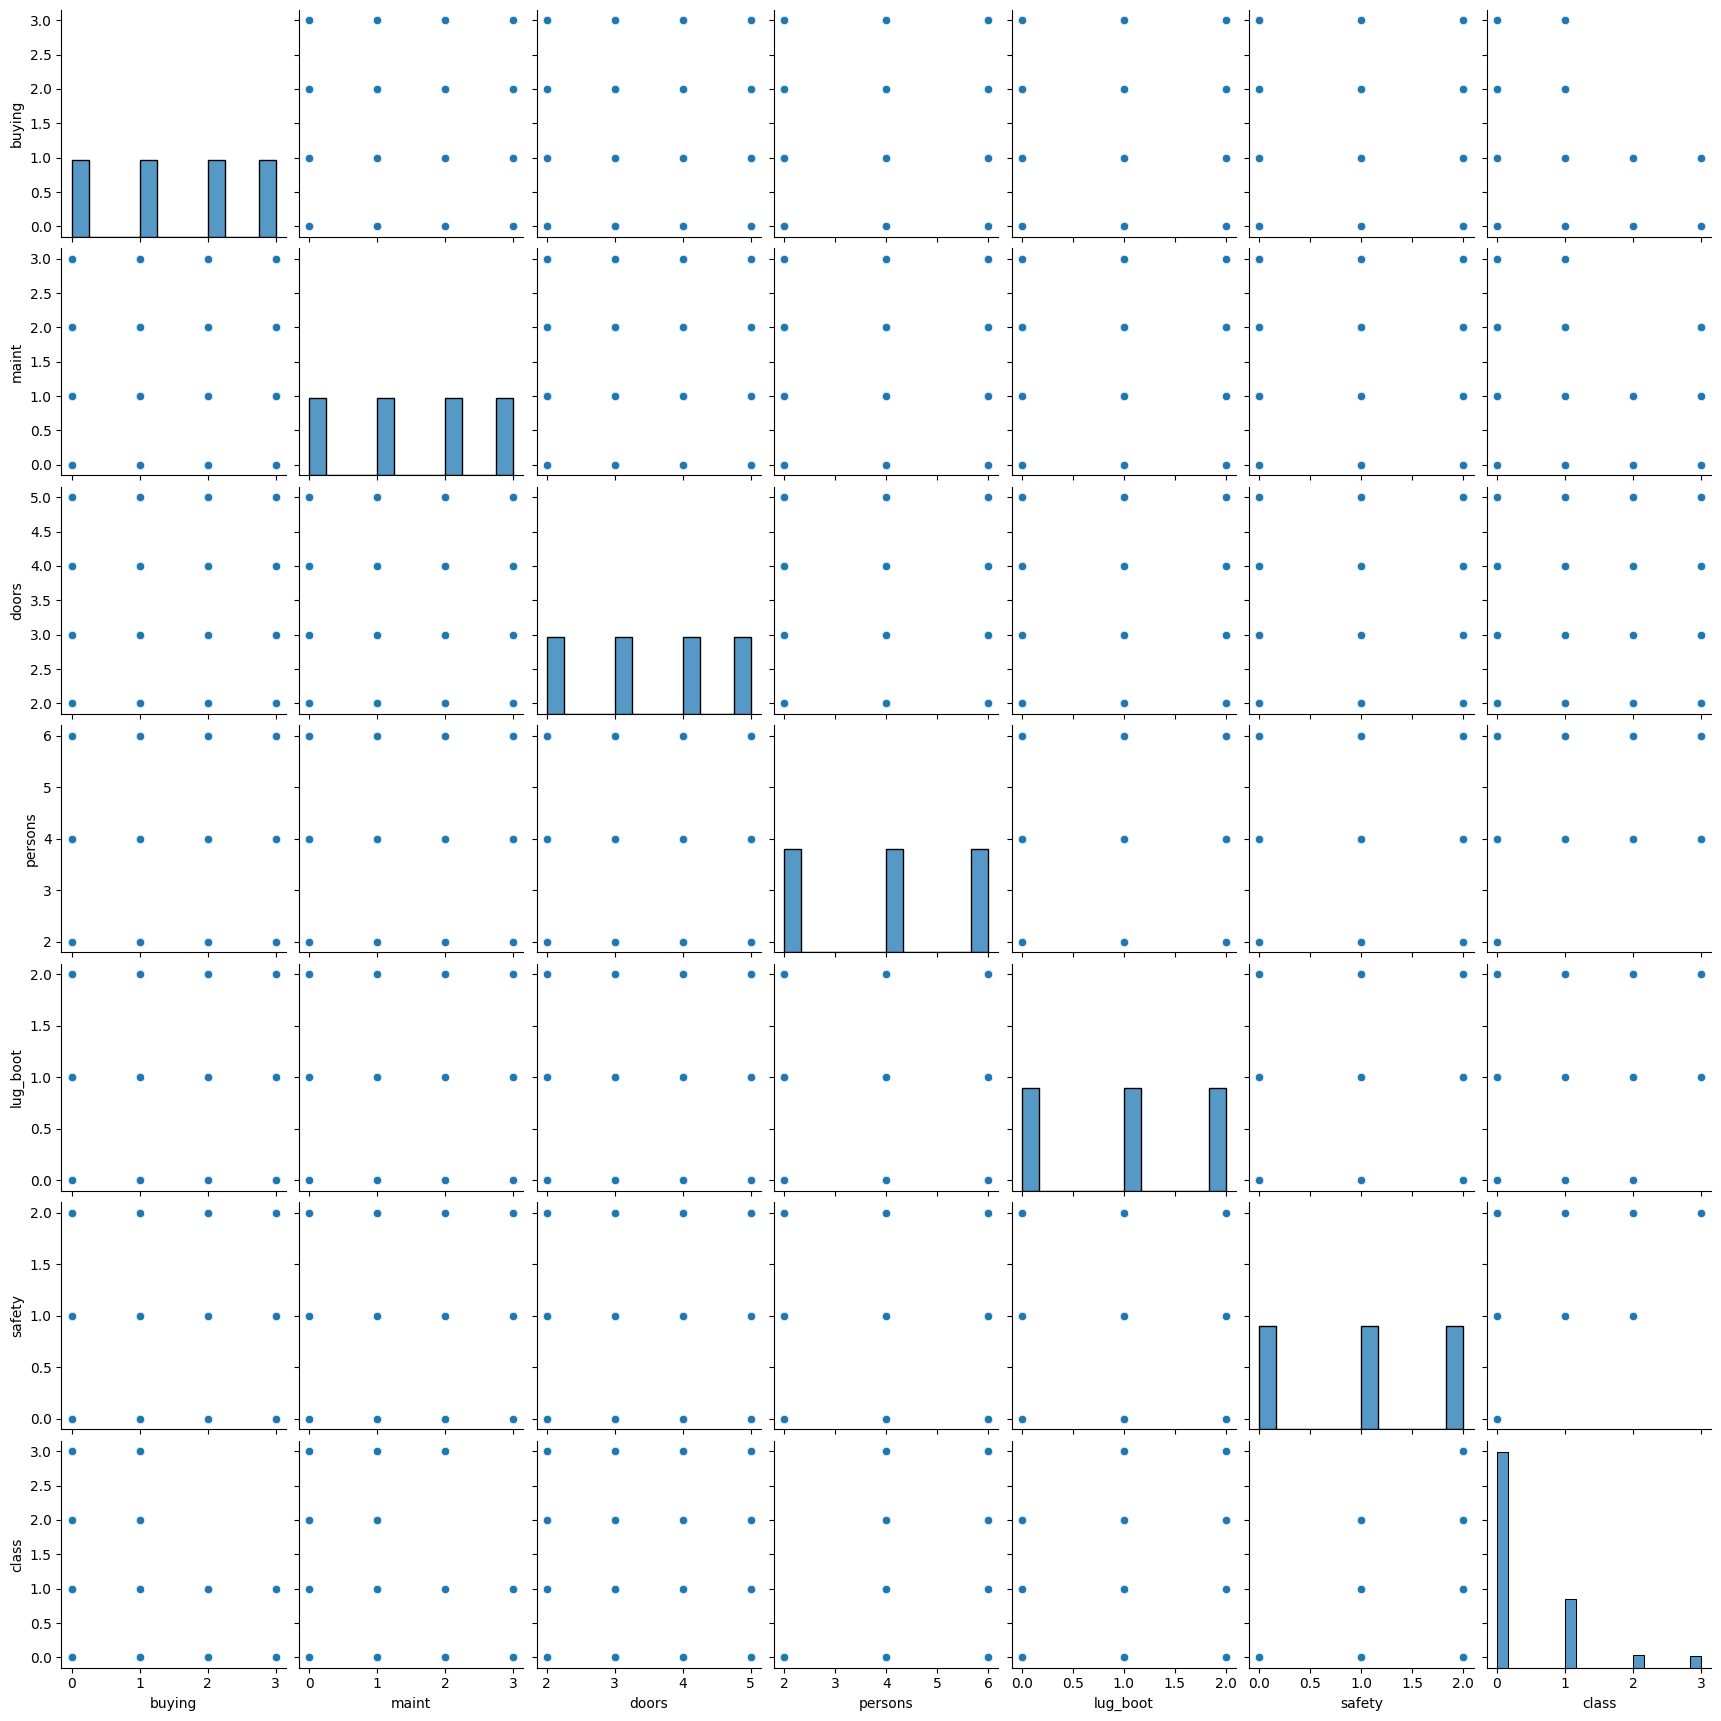

In [168]:
import seaborn as sns
sns.pairplot(data=data3) # it draws the scatter matrix which shows the data distribution, outliers, correlation etc

# from this graph we can see that data is normally distributed and thier are no any outliers in data

<Axes: xlabel='buying'>

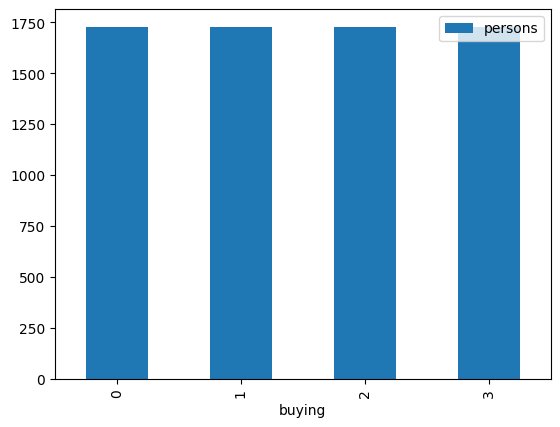

In [162]:
# here we count the numbers of persons for each category of buying. we can see that number of perons for each price category are same
# which means the no.of perons does not affect the price
data3.groupby('buying')[['persons']].sum().plot.bar()

<Axes: xlabel='class'>

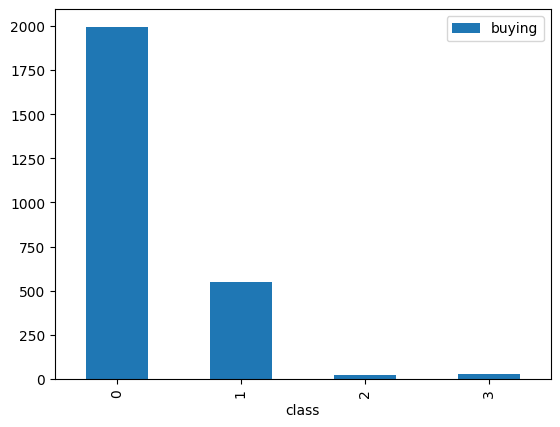

In [40]:
data3.groupby('class')[['buying']].sum().plot.bar()
# from the graph we can guess that the car with high prices are unacceptible

### Data Splitting 

- we have used 80:20 ratio for data splitting into train and test set because according to our data it suits well

In [41]:
# Import necessary library for train-test split
from sklearn.model_selection import train_test_split

# Extract features (X) and target variable (Y) from the dataset
X = data3.iloc[:, 0:-1]  # Features (all columns except the last one)
Y = data3.iloc[:, -1]    # Target variable (last column)

# Perform a train-test split on the dataset
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)
# - X and Y are the features and target variable respectively
# - test_size=0.2 specifies that 20% of the data will be used for testing (80% for training)
# - xtrain, xtest: Training and testing feature sets
# - ytrain, ytest: Corresponding training and testing target sets

# Task 2.1

### Data Modeling using Decision Tree Classifier
- `(related to task 2.1 )`

The following code sets up a grid of hyperparameters for a decision tree classifier (dtc) and uses GridSearchCV from scikit-learn to search for the best combination of these hyperparameters. It specifies different values to try for each hyperparameter and uses 4-fold cross-validation to evaluate the model's performance with each combination of hyperparameters. Finally, it fits the GridSearchCV object to the training data, which performs the grid search and cross-validation to determine the best parameters for the decision tree model based on the specified scoring metric (in this case, accuracy).

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# using Decision tree classifier as non parametric algorithm for classfication task
dtc = DecisionTreeClassifier()
# we are using 4-fold cross validation and GridsearchCV to get best results
param_grid = {  # Define a dictionary with different parameters to be tested
    'criterion': ['gini', 'entropy'],  # Different criteria for impurity calculation
    'max_depth': [3, 5, 7],  # Maximum depth of the decision tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required in a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=4, scoring='accuracy')
# - dtc: The decision tree classifier model
# - param_grid: The parameter grid to search over
# - cv=4: Number of folds for cross-validation (in this case, 4-fold cross-validation)
# - scoring='accuracy': The scoring metric to use for evaluation

# Fit the GridSearchCV object to the training data
grid_search.fit(xtrain, ytrain)
# - This performs an exhaustive search over the specified parameter values,
#   evaluating the model's performance using cross-validation on the training data


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [94]:
# Retrieve the best parameters found by GridSearchCV
best_params = grid_search.best_params_
# - This retrieves the best combination of hyperparameters found during the grid search

# Retrieve the best score obtained by GridSearchCV
best_score = grid_search.best_score_
# - This retrieves the best mean cross-validated score achieved by the model
#   with the best parameters found during grid search

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)
# - Displays the best parameters and their corresponding best score found during grid search


Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.9262021445924437


### Training and testing on best parameters

In [45]:
dtcc = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=1, min_samples_split=2)
dtcc.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

### Evaluating and Visualizing Results
- `(related to task 2.1 )`

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Predict using the decision tree model (dtcc) on the test data (xtest)
preds = dtcc.predict(xtest)

# Calculate accuracy, precision, recall, and confusion matrix
acc = accuracy_score(ytest, preds)  # Calculate accuracy
cm = confusion_matrix(ytest, preds)  # Generate confusion matrix

# Calculate precision and recall scores
precision_dtc = precision_score(ytest, preds, average='weighted')  # Calculate precision
recall_dtc = recall_score(ytest, preds, average='weighted')  # Calculate recall

# Print the metrics
print("Accuracy:", acc)  # Print accuracy
print("Precision:", precision_dtc)  # Print precision
print("Recall:", recall_dtc)  # Print recall
print("Confusion Matrix:")
print(cm)  # Print confusion matrix


Accuracy: 0.930635838150289
Precision: 0.932590084099397
Recall: 0.930635838150289
Confusion Matrix:
[[239   6   0   0]
 [  4  61   3   4]
 [  0   5   8   2]
 [  0   0   0  14]]


<Axes: >

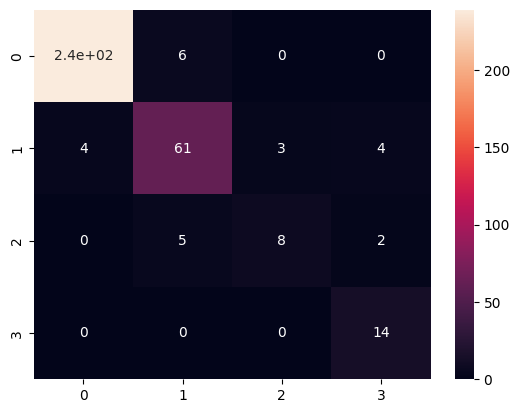

In [49]:
sns.heatmap(cm, cbar=True, annot=True) # this heatmap shows that the darkest values are wrongly predicted but there are not much values in darkest areas of heatmap

### DecisionTree Evaluation of predictions vs actuals
- `(related to task 2.1 )`

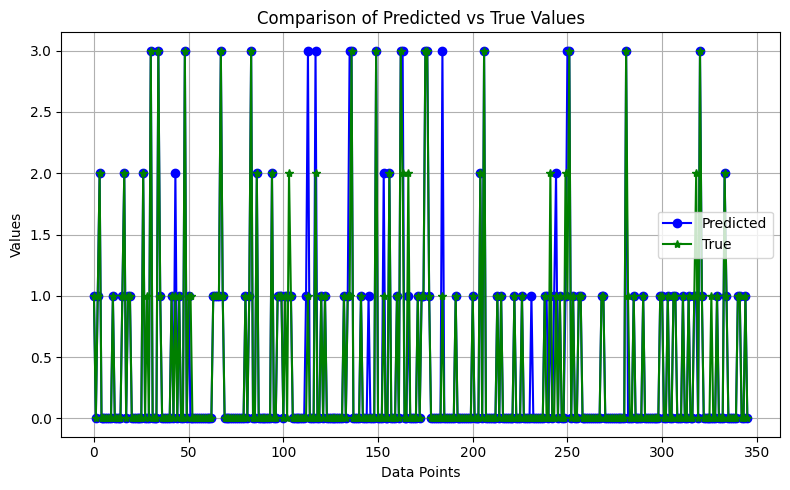

In [50]:
# Creating an array of indices or x-values
indices = range(len(preds))

# Plotting the predicted values and true values to check how many are wrongly predicted
plt.figure(figsize=(8, 5)) 
plt.plot(indices, preds, marker='o', linestyle='-', color='blue', label='Predicted')
plt.plot(indices, ytest, marker='*', linestyle='-', color='green', label='True')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Comparison of Predicted vs True Values')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()
# in this graph where the green and blue points are not much overlapped they are wrongly prredicted values

# Task 2.2

# Artificial Neural Network (ANN)
- `(related to task 2.2 )`
- `Input Layer:` The input layer is specified with input_shape=(6,), indicating it expects input data with six features.
- `Hidden Layers:` Three hidden layers are added with 16, 32, and 64 neurons respectively, each using the ReLU (Rectified Linear Activation) function. Increasing the number of neurons in successive layers allows the network to learn more complex representations from the data.
- `Output Layer:` The output layer consists of four neurons, matching the number of classes in the car evaluation dataset. It uses the softmax activation function, suitable for multi-class classification problems. Softmax outputs probabilities for each class, and the class with the highest probability is predicted.
##### Why This Configuration?
- `ReLU Activation:` ReLU is used as an activation function for hidden layers. ReLU is computationally efficient and helps in avoiding the vanishing gradient problem.
- `Increasing Neurons:` The choice of increasing neurons in hidden layers can help the model learn hierarchical representations of the input data, potentially capturing more intricate patterns.
#### Weight Initialization:
The default weight initialization scheme used in Keras for Dense layers is Glorot uniform initialization (also known as Xavier uniform initialization) for the weights and zeros for the biases. Glorot initialization helps in preventing the vanishing or exploding gradient problem during training.

#### Optimizer: Adam
**Explanation:** Adam (Adaptive Moment Estimation) is an advanced optimization algorithm widely used in training neural networks.

**Functionality:** It combines ideas from RMSprop and momentum, utilizing adaptive learning rates for each parameter. It computes individual learning rates for different parameters, enabling faster convergence and adaptability to varying gradient magnitudes.

**Advantages:** Adam dynamically adjusts learning rates, making it suitable for a wide range of neural network architectures and training scenarios. It often converges faster and is less sensitive to hyperparameters.
#### Loss Function: Sparse Categorical Crossentropy
**Explanation:** Sparse Categorical Crossentropy is a loss function utilized in multi-class classification tasks with integer labels (not one-hot encoded).

**Functionality:** It computes the cross-entropy loss between the true labels and the predicted probability distribution for each class. For integer-coded labels, it expects the target to be provided as integers, where each integer represents the class index.

**Advantages:** It's suitable for classification tasks with multiple classes, providing a measure of how well the predicted probability distribution aligns with the true labels.

#### Summary
This configuration aims to create a network capable of learning complex patterns present in the car evaluation dataset by gradually increasing the capacity of the hidden layers while using appropriate activation functions for non-linearity and weight initialization to aid in stable training.

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Define the model
model = Sequential()
# Add layers to the model
model.add(Dense(16, activation='relu', input_shape=(6,)))  # Input layer with 64 neurons and ReLU activation
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
model.add(Dense(64, activation='relu'))  # Additional hidden layer with 16 neurons and ReLU activation
model.add(Dense(4, activation='softmax'))  # Output layer with 4 neurons for 4 classes and Softmax activation
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(xtrain, ytrain, epochs=40, batch_size=16, validation_split=0.2)

Epoch 1/40
70/70 [==============================] - 1s 6ms/step - loss: 1.0007 - accuracy: 0.5864 - val_loss: 0.7284 - val_accuracy: 0.7004
Epoch 2/40
70/70 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.7448 - val_loss: 0.5910 - val_accuracy: 0.7653
Epoch 3/40
70/70 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.7991 - val_loss: 0.4970 - val_accuracy: 0.7834
Epoch 4/40
70/70 [==============================] - 0s 3ms/step - loss: 0.4025 - accuracy: 0.8462 - val_loss: 0.4020 - val_accuracy: 0.8484
Epoch 5/40
70/70 [==============================] - 0s 3ms/step - loss: 0.3449 - accuracy: 0.8706 - val_loss: 0.3530 - val_accuracy: 0.8664
Epoch 6/40
70/70 [==============================] - 0s 3ms/step - loss: 0.2909 - accuracy: 0.8896 - val_loss: 0.3398 - val_accuracy: 0.8773
Epoch 7/40
70/70 [==============================] - 0s 3ms/step - loss: 0.2649 - accuracy: 0.8968 - val_loss: 0.3271 - val_accuracy: 0.8628
Epoch 8/40
70/70 [==

### ANN Model Evaluation

In [118]:
# Evaluate the model
loss, accuracy = model.evaluate(xtest, ytest)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
# explaination of code is given in the next CNN section
preds_ANN = np.argmax(model.predict(xtest), axis=1)
acc_ANN = accuracy_score(ytest, preds_ANN)
cm_ANN = confusion_matrix(ytest, preds_ANN)

precision_ANN = precision_score(ytest, preds_ANN, average='weighted')
recall_ANN = recall_score(ytest, preds_ANN, average='weighted') 

print("ANN Accuracy: ", acc_ANN)
print("ANN Precesion: ", precision_ANN)
print("ANN Recall: ", recall_ANN)
print("ANN Confusion Matrix: \n", cm_ANN)

 1/11 [=>............................] - ETA: 0s - loss: 0.0837 - accuracy: 0.9688

11/11 [==============================] - 0s 3ms/step - loss: 0.1139 - accuracy: 0.9653
Test Accuracy: 96.53%
11/11 [==============================] - 0s 2ms/step
ANN Accuracy:  0.9653179190751445
ANN Precesion:  0.9685663671871593
ANN Recall:  0.9653179190751445
ANN Confusion Matrix: 
 [[239   6   0   0]
 [  1  70   0   1]
 [  0   2  11   2]
 [  0   0   0  14]]


### ANN Accuracy and Loss Curves

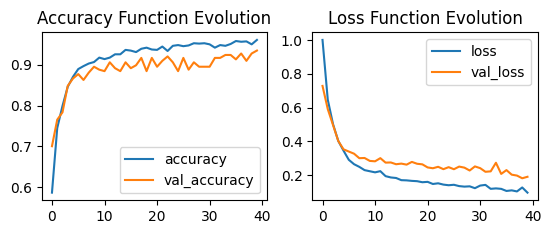

In [67]:
# explaination of code is given in the next CNN section
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Function Evolution')
plt.legend()

# Task 2.3

# Convolutional Nueral Network(CNN)
- `(related to task 2.3 )`

In [79]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# Reshape the data for CNN (assuming 6 features)
X_train_reshaped = np.array(xtrain).reshape((xtrain.shape[0], xtrain.shape[1], 1))  # Reshape for 1D convolution
# Define the model --> keras sequential  model
modelCNN = Sequential()
# Add convolutional layers
modelCNN.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(6, 1)))  # Convolutional layer with input shape (6,1) as we have 6 features
modelCNN.add(MaxPooling1D(pool_size=2))  # Max pooling layer
# Flatten the output for dense layers
modelCNN.add(Flatten())
# Add fully connected layers
modelCNN.add(Dense(64, activation='relu'))  # Dense hidden layer
modelCNN.add(Dense(4, activation='softmax'))  # Output layer with Softmax for 4 classes
# Compile the model with adam optimizer which is best for most of cases and adding accuracy metric to ensure the accuracy of validation data
modelCNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model with trainind and validation size of 80 and 20 respectivly
historyCNN = modelCNN.fit(X_train_reshaped, ytrain, epochs=40, batch_size=32, validation_split=0.2)

(1382, 6)
Epoch 1/40
35/35 [==============================] - 2s 18ms/step - loss: 0.9629 - accuracy: 0.6434 - val_loss: 0.8533 - val_accuracy: 0.6679
Epoch 2/40
35/35 [==============================] - 0s 5ms/step - loss: 0.8115 - accuracy: 0.7059 - val_loss: 0.7675 - val_accuracy: 0.6679
Epoch 3/40
35/35 [==============================] - 0s 5ms/step - loss: 0.7159 - accuracy: 0.7122 - val_loss: 0.7057 - val_accuracy: 0.6715
Epoch 4/40
35/35 [==============================] - 0s 4ms/step - loss: 0.6165 - accuracy: 0.7511 - val_loss: 0.5981 - val_accuracy: 0.7762
Epoch 5/40
35/35 [==============================] - 0s 4ms/step - loss: 0.5367 - accuracy: 0.7946 - val_loss: 0.5350 - val_accuracy: 0.7653
Epoch 6/40
35/35 [==============================] - 0s 4ms/step - loss: 0.4711 - accuracy: 0.8081 - val_loss: 0.4898 - val_accuracy: 0.8267
Epoch 7/40
35/35 [==============================] - 0s 4ms/step - loss: 0.4307 - accuracy: 0.8190 - val_loss: 0.4638 - val_accuracy: 0.8339
Epoch 8/4

### CNN Evaluation

In [119]:
# Reshape the test data for evaluation
xtest_reshaped = np.array(xtest).reshape((xtest.shape[0], xtest.shape[1], 1))  # Reshape test data

# Evaluate the model on the reshaped test data
loss, accuracy = modelCNN.evaluate(xtest_reshaped, ytest)  # Evaluate the CNN model
print(f'Test Accuracy: {accuracy * 100:.2f}%')  # Display the test accuracy

# Make predictions using the CNN model on the reshaped test data
preds_CNN = np.argmax(modelCNN.predict(xtest_reshaped), axis=1)  # Get predicted classes
acc_CNN = accuracy_score(ytest, preds_CNN)  # Calculate accuracy using sklearn's accuracy_score
cm_CNN = confusion_matrix(ytest, preds_CNN)  # Create a confusion matrix using sklearn
precision_CNN = precision_score(ytest, preds_CNN, average='weighted')  # or 'macro', 'micro', 'binary', etc.
recall_CNN = recall_score(ytest, preds_CNN, average='weighted') 
print("CNN Accuracy", acc_CNN)
print("CNN Recall", recall_CNN)
print("CNN Precisiom", precision_CNN)
print("CNN confusion matrix \n", cm_CNN)


11/11 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.9422
Test Accuracy: 94.22%
11/11 [==============================] - 0s 2ms/step
CNN Accuracy 0.9421965317919075
CNN Recall 0.9421965317919075
CNN Precisiom 0.9507616856588726
CNN confusion matrix 
 [[238   4   2   1]
 [  3  63   1   5]
 [  0   1  11   3]
 [  0   0   0  14]]


### CNN Accuracy and Loss curves


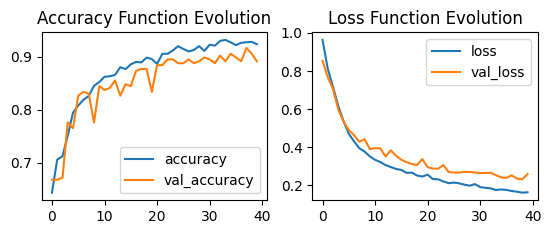

In [81]:
# Plotting the accuracy and validation accuracy
plt.subplot(2, 2, 1)  # Creating a subplot with 2 rows and 2 columns, selecting position 1
plt.plot(historyCNN.history['accuracy'], label='accuracy')  # Plotting the training accuracy
plt.plot(historyCNN.history['val_accuracy'], label='val_accuracy')  # Plotting the validation accuracy
plt.title('Accuracy Function Evolution')  # Setting the title for the subplot
plt.legend()  # Displaying the legend on the plot

# Plotting the loss and validation loss
plt.subplot(2, 2, 2)  # Creating a subplot with 2 rows and 2 columns, selecting position 2
plt.plot(historyCNN.history['loss'], label='loss')  # Plotting the training loss
plt.plot(historyCNN.history['val_loss'], label='val_loss')  # Plotting the validation loss
plt.title('Loss Function Evolution')  # Setting the title for the subplot
plt.legend()  # Displaying the legend on the plot

# Display the plots
plt.show()


### Saving all models for future use

`Note` uncomment this code when needed

In [102]:
# model.save('ANN_Model.h5') # saving ANN model in a file named ANN_Model.h5. h5 is an extension used for saving keras models
# modelCNN.save('CNN_Model.h5') # # saving CNN model in a file named CNN_Model.h5
# import joblib  # saving a scikit-learn Decision Tree classifier model can be done using Python's joblib
# joblib.dump(dtcc, 'Decision_Tree_Model.pkl') # saving decision tree model in a file named Decision_Tree_Model.pkl

['Decision_Tree_Model.pkl']

### Loading saved models for testing

here we have used saved model so that we have not to run code all code again and again

In [1]:
from tensorflow.keras.models import load_model
import joblib
dtcc_loaded_model = joblib.load('saved_models/decision_tree_model.pkl')
ann_loaded_model = load_model('saved_models/ANN_Model.h5') # ANN load model
cnn_loaded_model = load_model('saved_models/CNN_Model.h5') # CNN Load model

# Performance comparison of All three algorithms

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix

################ DTC #################
preds = dtcc.predict(xtest)
acc = accuracy_score(ytest, preds)
cm = confusion_matrix(ytest, preds)
print("Decision Tree Accuracy: ", acc)
############## ANN #############
preds_ANN = np.argmax(model.predict(xtest), axis=1)
acc_ANN = accuracy_score(ytest, preds_ANN)
cm_ANN = confusion_matrix(ytest, preds_ANN)
print("ANN Accuracy: ", acc_ANN)
############## CNN #############
preds_CNN = np.argmax(modelCNN.predict(xtest_reshaped), axis=1)
acc_CNN = accuracy_score(ytest, preds_CNN)   
cm_CNN = confusion_matrix(ytest, preds_CNN)  
print("CNN Accuracy: ", acc_CNN)

Decision Tree Accuracy:  0.930635838150289
11/11 [==============================] - 0s 2ms/step
ANN Accuracy:  0.9653179190751445
11/11 [==============================] - 0s 959us/step
CNN Accuracy:  0.9421965317919075


# Result
### ANN Performed Well

The better performance of the ANN compared to the other models might suggest that the dataset contains complex relationships and patterns that the ANN architecture is more adept at capturing and learning. Additionally, effective tuning of hyperparameters in the ANN might have contributed to its higher accuracy compared to the other models.

#### Testing code

this is testing code for single example from user. you can run code and pass the inputs to check the prediction of all three algorithms

In [7]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
import joblib
dtcc_loaded_model = joblib.load('saved_models/decision_tree_model.pkl')
ann_loaded_model = load_model('saved_models/ANN_Model.h5') # ANN load model
cnn_loaded_model = load_model('saved_models/CNN_Model.h5') # CNN Load model
in_data = {
    'buying':input('enter buying value of car: '),
    'maint':input('enter maint value of car: '),
    'doors':input('enter doors value of car: '),
    'persons':input('enter persons value of car: '),
    'lug_boot':input('enter lug_boot value of car: '),
    'safety':input('enter safety value of car: '),
}

test_instance1 = pd.DataFrame(in_data, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], index=[0])

mapping_buy_maint = {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
mapping_safety = {'low': 0, 'med': 1, 'high': 2}
mapping_lug_boot = {'small': 0, 'med': 1, 'big': 2}
mapping_class = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}

# Map categorical strings to numerical values
test_instance1['buying'] = test_instance1['buying'].map(mapping_buy_maint)
test_instance1['maint'] = test_instance1['maint'].map(mapping_buy_maint)
test_instance1['safety'] = test_instance1['safety'].map(mapping_safety)
test_instance1['lug_boot'] = test_instance1['lug_boot'].map(mapping_lug_boot)
# test_instance['class'] = test_instance['class'].map(mapping_class)
test_instance2 = test_instance1.replace({'doors':{'5more':5}, 'persons':{'more':6}})
test_instance2 = test_instance2.astype({'doors':'int64', 'persons':'int64'})

# test_instance2 = test_instance2.values

car_classes = {0:'unacc',1:'acc', 2:'good', 3:'vgood'}

print('DTC Prediction: ', car_classes[dtcc_loaded_model.predict(test_instance2)[0]])
print('ANN Prediction: ', car_classes[np.argmax(ann_loaded_model.predict(test_instance2), axis=1)[0]])
print('CNN Prediction: ', car_classes[np.argmax(cnn_loaded_model.predict(test_instance2), axis=1)[0]])

DTC Prediction:  acc


1/1 [==============================] - 1s 548ms/step
ANN Prediction:  acc
1/1 [==============================] - 1s 900ms/step
CNN Prediction:  acc
